# Analysis
This script will take the final data and analyze it. This includes creating time series plots, and performing percental analyses.

## Set up

In [22]:
# install packages (optional if already installed)
%pip install pandas
%pip install matplotlib.pyplot

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# load final csv file as a dataframe:
csv_file_path = '../DATA/monthly_listeners_final.csv'  # Update with actual path
df = pd.read_csv(csv_file_path)

In [25]:
# convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%Y')

# create list of artists to distinguish between them
artists = df['Artist'].unique()

## Plotting Data

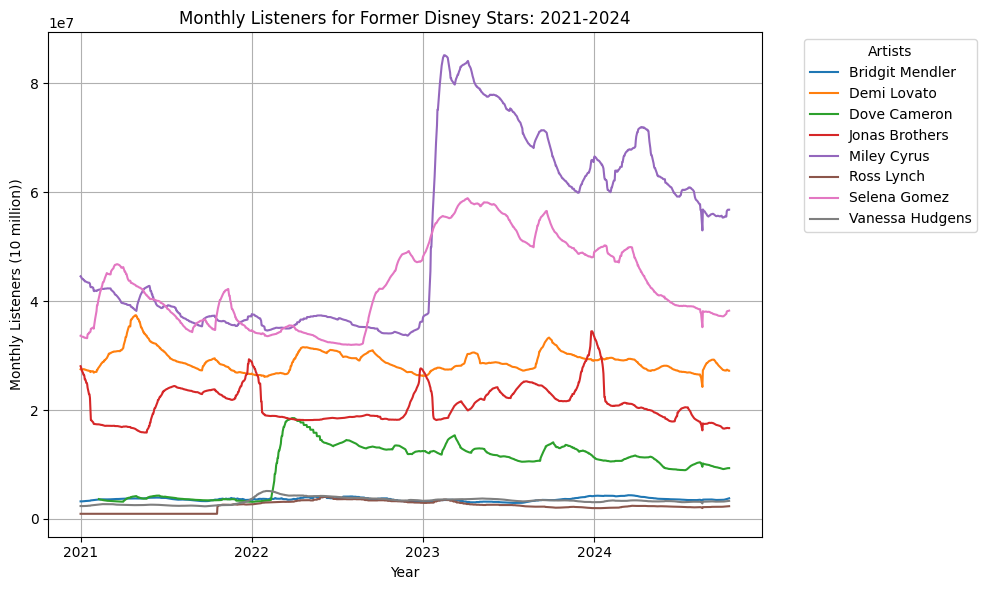

In [26]:
# plot each artist's monthly listener value throughout 2021-2024
plt.figure(figsize=(10, 6))

for artist in artists:
    artist_data = df[df['Artist'] == artist]
    plt.plot(artist_data['Date'], artist_data['Monthly Listeners'], label=artist)

# label plots
plt.title('Monthly Listeners for Former Disney Stars: 2021-2024')
plt.xlabel('Year')
plt.ylabel('Monthly Listeners (10 million))')
plt.legend(title="Artists", bbox_to_anchor=(1.05, 1), loc='upper left')

# set x-axis to label yearly ticks, more design factors
plt.grid(True)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
plt.tight_layout()

# save plot to output folder
plt.savefig('../OUTPUT/monthly_listeners_plot.png', dpi=300, bbox_inches='tight')
# display plot
plt.show()

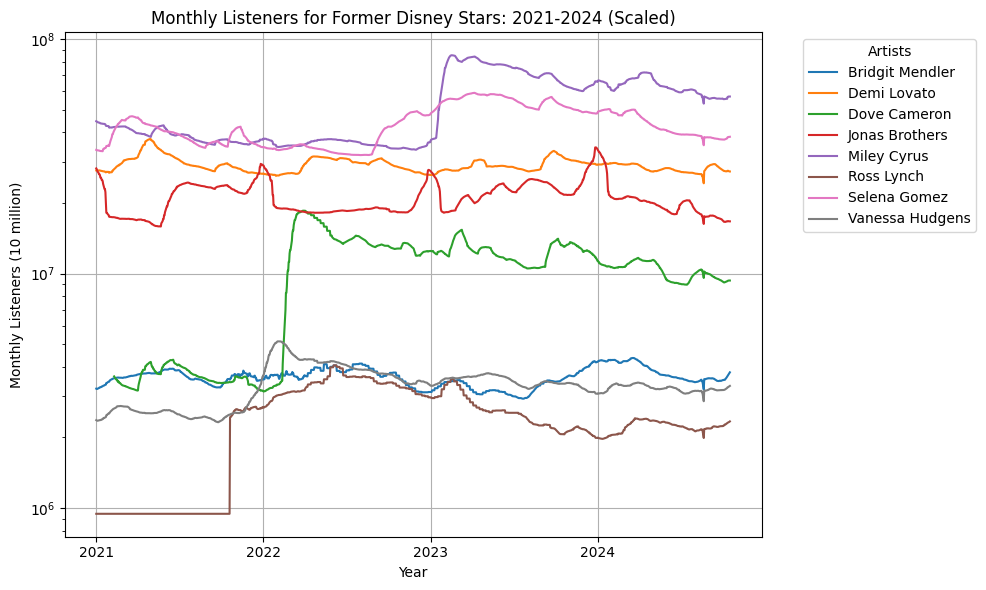

In [27]:
# plot each artist's monthly listener value throughout 2021-2024 but scaled to see less popular artists
plt.figure(figsize=(10, 6))

for artist in artists:
    artist_data = df[df['Artist'] == artist]
    plt.plot(artist_data['Date'], artist_data['Monthly Listeners'], label=artist)

# label plots
plt.title('Monthly Listeners for Former Disney Stars: 2021-2024 (Scaled)')
plt.xlabel('Year')
plt.ylabel('Monthly Listeners (10 million)')
plt.legend(title="Artists", bbox_to_anchor=(1.05, 1), loc='upper left')

# set x-axis to label yearly ticks, more design factors, scale y-axis logarithmically
plt.grid(True)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))  # Set x-axis labels by year
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())  # Ensure only one tick per year
plt.yscale('log')
plt.tight_layout()

# save plot to output folder
plt.savefig('../OUTPUT/monthly_listeners_plot.png', dpi=300, bbox_inches='tight')
# display plot
plt.show()

## Statistical Analysis

In [28]:
# save statistic results here
artist_stats = {}

# run statistics for each artist
for artist in df['Artist'].unique():
    artist_data = df[df['Artist'] == artist].sort_values(by='Date')

    # calculate basic statistics (average, minimum, maximum)
    avg_listeners = artist_data['Monthly Listeners'].mean()
    min_listeners = artist_data['Monthly Listeners'].min()
    max_listeners = artist_data['Monthly Listeners'].max()

    # calculate percent change from first value to last value
    first_value = artist_data['Monthly Listeners'].iloc[0]
    last_value = artist_data['Monthly Listeners'].iloc[-1]
    percent_change = ((last_value - first_value) / first_value) * 100

    # store results
    artist_stats[artist] = {
        'Average': avg_listeners,
        'Minimum': min_listeners,
        'Maximum': max_listeners,
        'Percent Change': percent_change
    }

In [29]:
# convert results to dataframe
artist_stats_df = pd.DataFrame.from_dict(artist_stats, orient='index')
# Display the statistics
print(artist_stats_df)
# Save statistics to csv files
artist_stats_df.to_csv('../OUTPUT/statistical_analysis.csv')

                      Average   Minimum   Maximum  Percent Change
Bridgit Mendler  3.621150e+06   2926713   4364688       17.401244
Demi Lovato      2.898551e+07  24247779  37435921       -1.018019
Dove Cameron     9.909454e+06   3142470  18541962      156.241823
Jonas Brothers   2.105195e+07  15867186  34470718      -40.526622
Miley Cyrus      5.137477e+07  33680629  85182173       27.457685
Ross Lynch       2.360604e+06    945687   4060722      147.619984
Selena Gomez     4.325079e+07  31972673  58923255       13.708253
Vanessa Hudgens  3.334272e+06   2323602   5137527       39.951347
